In [2]:
import warnings; 
warnings.simplefilter('ignore')

In [5]:
import pandas as pd
from prophet import Prophet

In [9]:
df = pd.read_csv('dataset_.csv')

In [10]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [11]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [5]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [6]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

18:24:35 - cmdstanpy - INFO - Chain [1] start processing
18:24:36 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.219307,713.678452,3894.899546,3042.219307,3042.219307,-639.435909,-639.435909,-639.435909,470.616698,...,16.616996,16.616996,16.616996,-1126.669603,-1126.669603,-1126.669603,0.0,0.0,0.0,2402.783399
1,2018-01-02,3042.958672,868.555147,3999.130923,3042.958672,3042.958672,-649.628445,-649.628445,-649.628445,470.616698,...,-11.283937,-11.283937,-11.283937,-1108.961206,-1108.961206,-1108.961206,0.0,0.0,0.0,2393.330227
2,2018-01-03,3043.698036,788.576080,4017.155436,3043.698036,3043.698036,-623.860305,-623.860305,-623.860305,470.616698,...,-4.410468,-4.410468,-4.410468,-1090.066535,-1090.066535,-1090.066535,0.0,0.0,0.0,2419.837731
3,2018-01-04,3044.437400,895.118163,3977.435808,3044.437400,3044.437400,-576.960606,-576.960606,-576.960606,470.616698,...,22.483932,22.483932,22.483932,-1070.061236,-1070.061236,-1070.061236,0.0,0.0,0.0,2467.476794
4,2018-01-05,3045.176765,950.210877,4064.774842,3045.176765,3045.176765,-613.030645,-613.030645,-613.030645,470.616698,...,-34.573623,-34.573623,-34.573623,-1049.073721,-1049.073721,-1049.073721,0.0,0.0,0.0,2432.146120


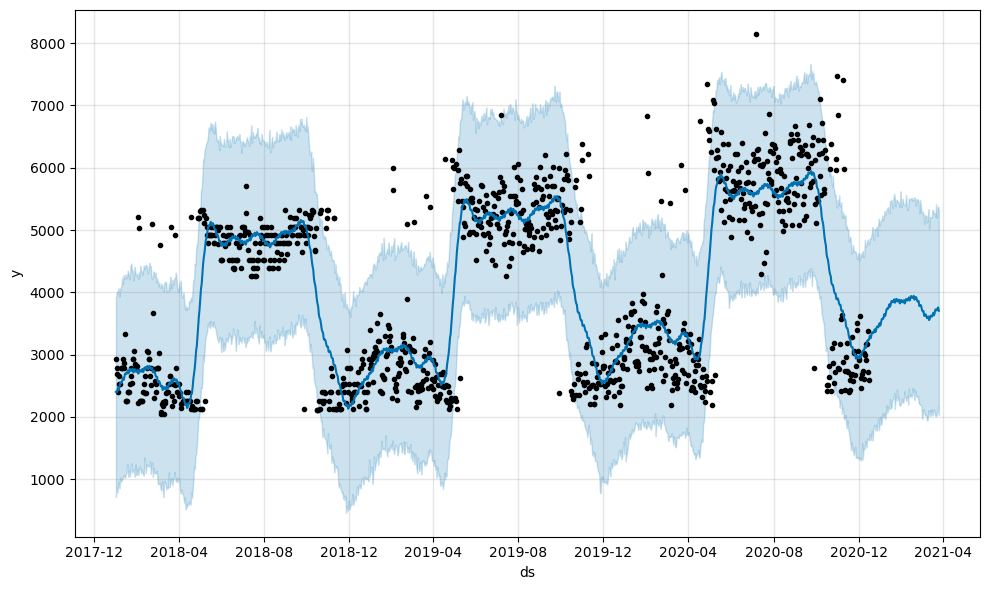

In [8]:
plot1 = m.plot(forecast)

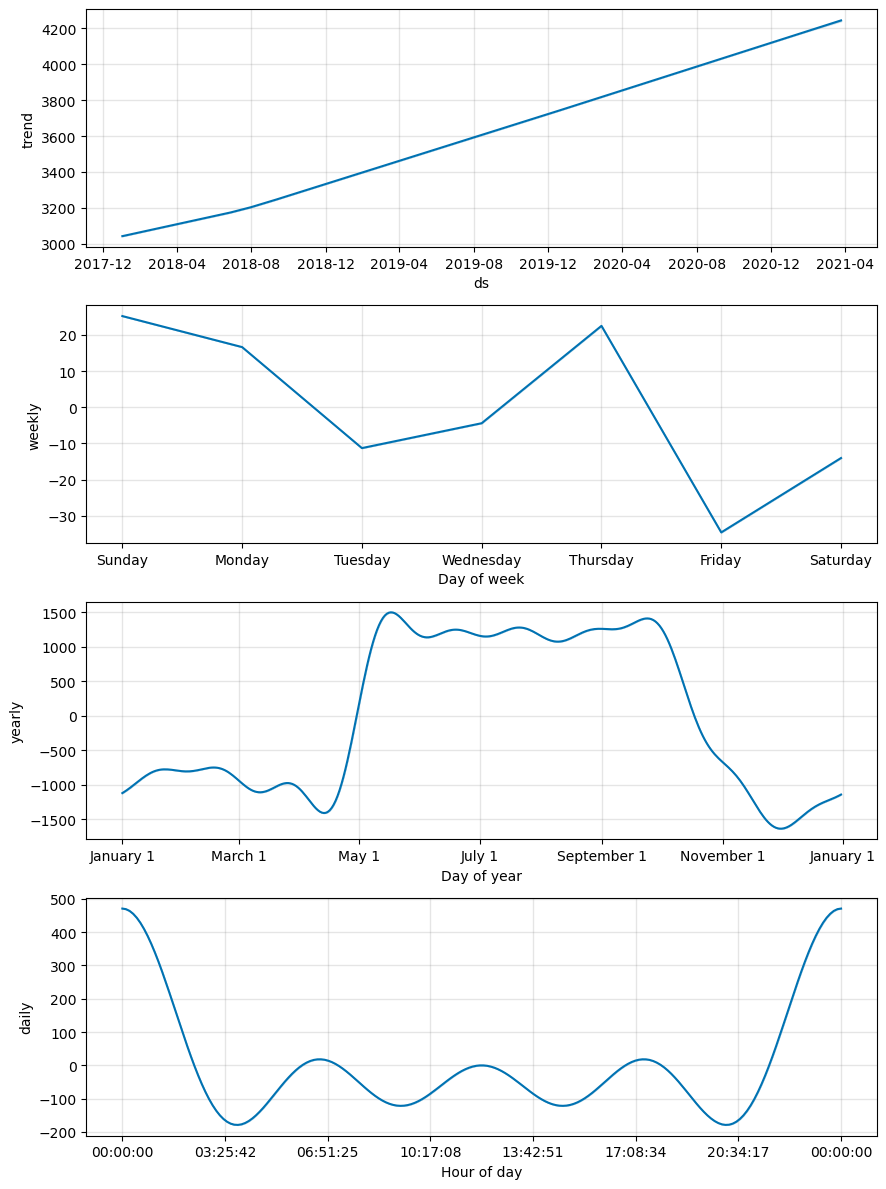

In [9]:
plt2 = m.plot_components(forecast)